## Import Libraries

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we create
pd.set_option('display.max_rows',None) #Lets you view all the rows and not just the head and tail

## Read in the Data

In [5]:
df = pd.read_csv('/Users/huseinjauhari/venv/movies.csv')

## Let's look at the data

In [153]:
df.head()

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
3731,5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,29
5302,7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,39
1795,3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,17
4730,6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,35
5158,7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,38


In [154]:
df.tail()

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
3898,5640,3794,6,6,2009,890,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0,35
1378,2434,2969,5,0,1993,1467,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0,14
2286,3681,1595,3,6,2000,1721,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0,21
154,272,2909,6,9,1982,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0,2
1920,3203,4966,5,4,1997,2152,5.7,5800.0,651,161,1811,47,15000000,309,504,85.0,17


## Let's see if there's any missing data

In [59]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

# Removing the nulls
df = df.dropna()

# Resetting the index
df = df.reset_index()

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


## Data types for our columns

In [45]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross       float64
company      object
runtime     float64
dtype: object

## Change data type of columns

In [60]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

## Create correct year column

In [110]:
df['correctyear'] = df['released'].astype(str).str.split(', ').str[1].astype(str).str[:4]

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
5417,7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
5418,7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
5419,7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


## Sorting by Gross

In [117]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

## Dropping any duplicates

In [ ]:
df.drop_duplicates()

## Scatter Plot with Budget vs. Gross

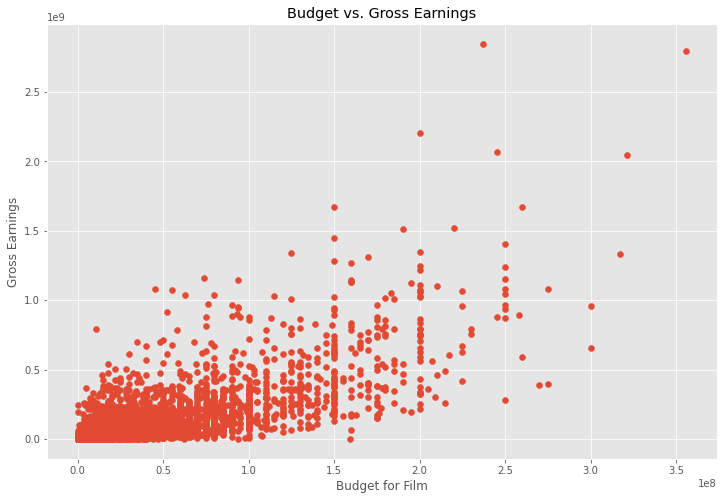

In [119]:
plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs. Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show()

## Plotting the budget vs. gross using Seaborn

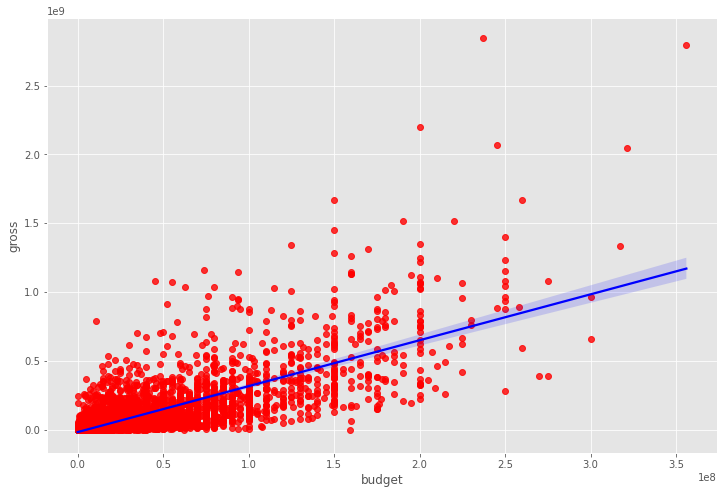

In [122]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.show()

## Let's start looking at the correlation

In [125]:
df.corr()

,index,year,score,votes,budget,gross,runtime
index,1.000000,0.999522,0.046493,0.192525,0.319194,0.264121,0.067925
year,0.999522,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.046493,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.192525,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.319194,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.264121,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.067925,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


## Using heatmaps to visualize the Correlation Matrix

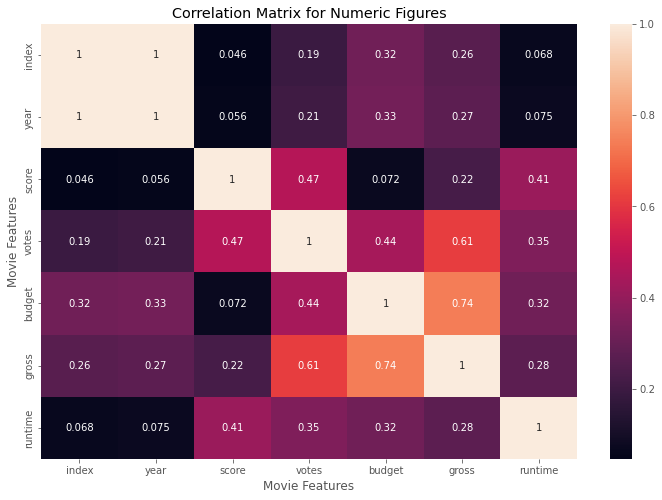

In [129]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Figures')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

## Looks at company

In [134]:
df_numerized = df 

for col in df_numerized.columns:
    if(df_numerized[col].dtype == object):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
df_numerized

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
3731,5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,29
5302,7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,39
1795,3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,17
4730,6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,35
5158,7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,5640,3794,6,6,2009,890,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0,35
1378,2434,2969,5,0,1993,1467,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0,14
2286,3681,1595,3,6,2000,1721,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0,21
154,272,2909,6,9,1982,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0,2


## Correlation Matrix for all fields

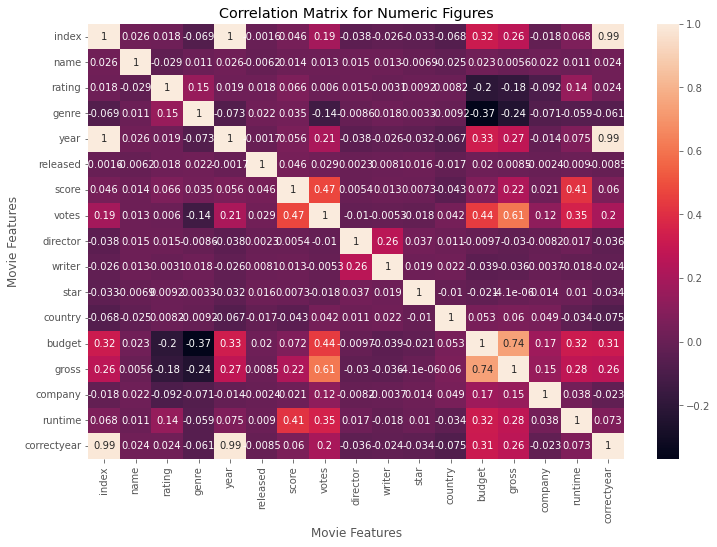

In [135]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Figures')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

## Unstacking

In [150]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()

corr_pairs

index        index          1.000000
             name           0.026000
             rating         0.018488
             genre         -0.069474
             year           0.999522
             released      -0.001636
             score          0.046493
             votes          0.192525
             director      -0.038165
             writer        -0.026044
             star          -0.032773
             country       -0.068233
             budget         0.319194
             gross          0.264121
             company       -0.017703
             runtime        0.067925
             correctyear    0.987640
name         index          0.026000
             name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
 

## Ordering the Correlation

In [148]:
sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[sorted_pairs>0.5]
high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
correctyear  index          0.987640
index        correctyear    0.987640
year         correctyear    0.987770
correctyear  year           0.987770
year         index          0.999522
index        year           0.999522
             index          1.000000
director     director       1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
name         name           1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
d